# Taylor Swift Sentiment Analysis using Twitter - Mikayla Peterson (200425538)

# Project Question
How has public perception of Taylor Swift changed since the announcement and opening shows of the Eras Tour?

# Hypothesis
I think that for the brief period before the official announcement of the Eras Tour on November 1st, 2022, the overall sentiment is largely **positive**.

The Ticketmaster Verified Fan Presale for the Eras Tour began November 15th, 2022; due to major complications with the presale, I think public sentiment shifted **negatively**.

The opening shows of the tour were in Glendale, AZ on March 17th and 18th and the tour has received glowing reviews. As a result, I think public sentiment became more **positive**.

I will be using Sentiment Analysis techniques to test my hypothesis.

# Miscellaneous Notes
I chose to test both Naive-Bayes and VADER for one reason. The Naive-Bayes approach gave me exposure to traditional NLP methods and techniques including pre-processing and I wanted to learn those techniques and the reasons why they are used. VADER, according to my interpretation of the documentation, does not require preprocessing which would make processing the data in my project faster.

The dataset is **unbalanced**. I don't think it would be superuseful in the context of my problem to have an equal number of positive, negative, and neutral tweets since the sentiment % graphs would be very different.

In [ ]:
# if you plan to run this on your own machine, make sure to pip install the following!
#!pip install snscrape
#!pip install nltk
#!pip install textblob
#!pip install twython

In [1]:
import snscrape.modules.twitter as sntwitter # used to scrape Tweets from Twitter
import pandas as pd
import numpy as np
import nltk

%matplotlib inline # used to make sure plots render properly in Jupyter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [301]:
#https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
nltk.download('twitter_samples')
nltk.download('punkt') # pre-trained model to tokenize words and sentences
nltk.download('wordnet') # used to determine the base words [if it complains about this not working, unzip it where it's downloaded]
nltk.download('averaged_perceptron_tagger') # used to determine the context of a word in a sentence
nltk.download('stopwords') # most common words like 'a'
from nltk.tag import pos_tag # used to tag sentences
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
from nltk.tokenize import word_tokenize
import re, string, random

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/mikaylapeterson/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mikaylapeterson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mikaylapeterson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mikaylapeterson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikaylapeterson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mikaylapeterson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Data Collection (Do NOT Run it will take ~4hours to run)
Library used to get the tweets: snscrape

I used snscrape to scrape tweets since I was having issues setting up an account to use with the official API.

### FAQ
**How are queries generated?**

Using the search bar result after using the advanced Twitter search.

**If I can't run this, what datasets should I use?**

I have datasets publically available on GitHub in this project repository.

In [ ]:
query_to_taylor = '(to:taylorswift13 lang:en since:2022-10-21)' # these are tweets to Taylor
query_mention_taylor = '((@taylorswift13) lang:en since:2022-10-21)' # these are tweets mentioning her account
query_contains_Taylor_Swift = 'Taylor Swift lang:en since:2022-10-21' # these are tweets containing her name

In [ ]:
# function to download tweets with a specified query
def tweets_to_df(query, limit):
  tweets = []
  for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
      break
    else:
      tweets.append([tweet.url, tweet.date, tweet.username, tweet.content, tweet.retweetCount, tweet.likeCount, tweet.replyCount, tweet.quoteCount])

  df = pd.DataFrame(tweets, columns=['URL', 'Date', 'User', 'Tweet', 'Retweets', 'Likes', 'Replies', 'Quotes'])
  
  return df

In [15]:
# helper function to download dataframe to csv file
def download_csv(dframe, file_name):
  dframe.to_csv(file_name + '.csv')
  files.download(file_name + '.csv')

In [ ]:
# this takes ~16 minutes with 10000 tweets per query
# it took 4 hours and 13 minutes with 150000 tweets per query
dframe = tweets_to_df(query_to_taylor, 150000) #150000
download_csv(dframe, 'to_taylor')

dframe = tweets_to_df(query_mention_taylor, 150000)
download_csv(dframe, 'mention_taylor')

dframe = tweets_to_df(query_contains_Taylor_Swift, 150000)
download_csv(dframe, 'contains_taylor_swift')

<ipython-input-3-c679c19accd6>:8: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.url, tweet.date, tweet.username, tweet.content, tweet.retweetCount, tweet.likeCount, tweet.replyCount, tweet.quoteCount])
<ipython-input-3-c679c19accd6>:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.url, tweet.date, tweet.username, tweet.content, tweet.retweetCount, tweet.likeCount, tweet.replyCount, tweet.quoteCount])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-3-c679c19accd6>:8: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.url, tweet.date, tweet.username, tweet.content, tweet.retweetCount, tweet.likeCount, tweet.replyCount, tweet.quoteCount])
<ipython-input-3-c679c19accd6>:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.url, tweet.date, tweet.username, tweet.content, tweet.retweetCount, tweet.likeCount, tweet.replyCount, tweet.quoteCount])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-3-c679c19accd6>:8: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.url, tweet.date, tweet.username, tweet.content, tweet.retweetCount, tweet.likeCount, tweet.replyCount, tweet.quoteCount])
<ipython-input-3-c679c19accd6>:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.url, tweet.date, tweet.username, tweet.content, tweet.retweetCount, tweet.likeCount, tweet.replyCount, tweet.quoteCount])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Uploading Downloaded Datasets and Merging

To make the data easier to deal with, I have merged 4 CSV files of Tweets into a large dataframe.

To analyze the date ranges in my hypothesis, I can split the dataframe into dates later since the sentiment is calculated for each Tweet individually.

In [2]:
df1 = pd.read_csv('to_taylor.csv')
df2 = pd.read_csv('mention_taylor.csv')
df3 = pd.read_csv('to_taylor(1).csv')
df4 = pd.read_csv('mention_taylor(1).csv')

In [3]:
df3 = df3.drop(['Retweets', 'Likes', 'Replies', 'Quotes'], axis=1)
df4 = df4.drop(['Retweets', 'Likes', 'Replies', 'Quotes'], axis=1)

In [4]:
df_merged = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      600000 non-null  int64 
 1   URL     600000 non-null  object
 2   Date    600000 non-null  object
 3   User    600000 non-null  object
 4   Tweet   600000 non-null  object
dtypes: int64(1), object(4)
memory usage: 22.9+ MB


In [6]:
df_merged = df_merged.sort_values(by=['Date'], ascending=True)
df_merged.head()

,ID,URL,Date,User,Tweet
149999,149999,https://twitter.com/stainlessswift/status/1583...,2022-10-21 08:17:02+00:00,stainlessswift,@taylorswift13 tell me when something is comin...
149998,149998,https://twitter.com/ParisCole9/status/15833718...,2022-10-21 08:17:16+00:00,ParisCole9,@taylorswift13 Please remind all followers to ...
149996,149996,https://twitter.com/Lou_Mc_Cormack/status/1583...,2022-10-21 08:17:40+00:00,Lou_Mc_Cormack,@taylorswift13 Midnights is a BOP! It reminds ...
149997,149997,https://twitter.com/justinxbff/status/15833719...,2022-10-21 08:17:40+00:00,justinxbff,@taylorswift13 @jackantonoff hi Taylor. i hope...
149995,149995,https://twitter.com/greyymae/status/1583371942...,2022-10-21 08:17:43+00:00,greyymae,@taylorswift13 i am innlove with you


In [7]:
df_merged.tail()

,ID,URL,Date,User,Tweet
450004,4,https://twitter.com/sweetnegrande/status/16380...,2023-03-21 04:39:46+00:00,sweetnegrande,@airhe4dd_ @corneil_ri @PopCrave @taylorswift1...
450003,3,https://twitter.com/robonthemic/status/1638037...,2023-03-21 04:40:08+00:00,robonthemic,@USCmensvolley @uscwomensvolley @taylorswift13...
450002,2,https://twitter.com/reachonair/status/16380378...,2023-03-21 04:40:33+00:00,reachonair,Come and listen to Message In A Bottle (Taylor...
450001,1,https://twitter.com/starsglow_/status/16380379...,2023-03-21 04:41:01+00:00,starsglow_,@getawaydynasty @WerePagesTurned @TheSwiftSoci...
450000,0,https://twitter.com/InsideIcarus/status/163803...,2023-03-21 04:41:07+00:00,InsideIcarus,@tis_sjoberg @shekharmehndole @taylorswift13 I...


## Classification Method 1: Naive-Bayes Classification

### FAQ
Common Normalization Tags:
- NNP: Noun, proper, singular
- NN: Noun, common, singular or mass
- IN: Preposition or conjunction, subordinating
- VBG: Verb, gerund or present participle
- VBN: Verb, past participle

I ended up using the built-in NLTK Naive-Bayes Classifier since it performs faster than my implementation. My dataset for this method only ended up being ~400 rows since manually classifying the Tweets while trying to objectively think of the overall sentiment was time consuming.

In [302]:
# I know I said I would try to classify ~1000 tweets, but I only ended up classifying 400.
classified_tweets = pd.read_csv('to_classifyNB_CLASSIFIED.csv')
print(classified_tweets.head())
print(classified_tweets.tail())

   Unnamed: 0  ID                                                URL  \
0           0   0  https://twitter.com/evermorewoods/status/16277...   
1           1   1  https://twitter.com/iJanetteCamacho/status/162...   
2           2   2  https://twitter.com/Purpose_Rick/status/162779...   
3           3   3  https://twitter.com/iJanetteCamacho/status/162...   
4           4   4  https://twitter.com/iJanetteCamacho/status/162...   

                        Date             User  \
0  2023-02-20 22:33:58+00:00    evermorewoods   
1  2023-02-20 22:21:05+00:00  iJanetteCamacho   
2  2023-02-20 22:20:30+00:00     Purpose_Rick   
3  2023-02-20 22:19:22+00:00  iJanetteCamacho   
4  2023-02-20 22:19:00+00:00  iJanetteCamacho   

                                               Tweet Classification  
0  @taylorswift13 give us evermore long pond sess...            Pos  
1  @taylorswift13 Your music has played a signifi...            Pos  
2  @taylorswift13 your on your own kid 😓 makes me...          

In [303]:
# function used to lemmatize words
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [304]:
# remove noise from the data
# needs to be fine tuned
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [305]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [306]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

In [307]:
positive_tweets = classified_tweets['Tweet'].where(classified_tweets['Classification'] == 'Pos')
negative_tweets = classified_tweets['Tweet'].where(classified_tweets['Classification'] == 'Neg')
positive_tweets = positive_tweets.dropna()
negative_tweets = negative_tweets.dropna()

stop_words = stopwords.words('english')

positive_tweet_tokens = []
for i in positive_tweets:
    positive_tweet_tokens.append(word_tokenize(i))
    
negative_tweet_tokens = []
for i in negative_tweets:
    negative_tweet_tokens.append(word_tokenize(i))

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

all_pos_words = get_all_words(positive_cleaned_tokens_list)

freq_dist_pos = FreqDist(all_pos_words)
print('most common words', freq_dist_pos.most_common(10))

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

print(len(dataset), '\n')
train_data = dataset[:262]
test_data = dataset[262:]

classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data) * 100)

print(classifier.show_most_informative_features(10))

most common words [('taylorswift13', 178), ('http', 32), ('love', 27), ('’', 24), ('please', 22), ("'s", 18), ('would', 16), ('taylor', 16), ('tour', 15), ('time', 13)]
328 

Accuracy is: 69.6969696969697
Most Informative Features
                  people = True           Negati : Positi =     11.7 : 1.0
                     n't = True           Negati : Positi =     11.1 : 1.0
                  please = True           Positi : Negati =      9.7 : 1.0
                      .. = True           Negati : Positi =      9.7 : 1.0
                    tour = True           Positi : Negati =      8.6 : 1.0
                     ... = True           Negati : Positi =      8.5 : 1.0
                   thing = True           Negati : Positi =      7.2 : 1.0
                     say = True           Negati : Positi =      6.4 : 1.0
                    know = True           Negati : Positi =      6.4 : 1.0
                    drug = True           Negati : Positi =      6.4 : 1.0
None


The biggest reason **why** the Naive Bayes classifier accuracy isn't as high as it could be is likely due to me misinterpreting Tweet sentiment as I was reading the Tweets to classify them.

# Method 2: Lexicon-Based Approach with VADER

Judging by the NLTK documentation [https://www.nltk.org/howto/sentiment.html#vader], VADER does not need text to be preprocessed. In fact, preprocessing the text looks like it would tamper with the sentiment scores since emoticons [i.e. :)] affect the sentiment score.

I did some basic testing and @'s to a user account make the sentiment more neutral.

In [9]:
positive_list = []
negative_list = []
neutral_list = []

tweets = df_merged
tweets_list = tweets['Tweet']
numTweets = len(tweets_list)

In [10]:
# takes ~1 hour to run with 600,000 tweets
scores = []
overall = []
for tweet in tweets_list:
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    scores.append(score)

    # get the score for each category
    pos = score['pos']
    neg = score['neg']
    neu = score['neu']
    
    # determine how to categorize the overall tweet sentiment
    if neg > pos:
        negative_list.append(tweet)
        overall.append('negative')
    elif pos > neg:
        positive_list.append(tweet)
        overall.append('positive')
    else:
        neutral_list.append(tweet)
        overall.append('neutral')

# append the sentiment scores, overall sentiment, and fix the dates for graphing purposes
tweets['scores'] = scores
tweets['overall_sentiment'] = overall
tweets['Date'] = pd.to_datetime(tweets['Date']).dt.date

# print the percentage of positive, negative, and neutral tweets in the dataset
print('positive', len(positive_list) / numTweets * 100)
print('negative', len(negative_list) / numTweets * 100)
print('neutral', len(neutral_list) / numTweets * 100)

positive 51.465
negative 12.3155
neutral 36.2195


In [393]:
# prepare the data to be graphed
print(tweets)
temp = tweets[['Date', 'overall_sentiment']]
temp = temp.groupby('Date')['overall_sentiment'].value_counts().unstack()
print(temp)

            ID                                                URL        Date  \
149999  149999  https://twitter.com/stainlessswift/status/1583...  2022-10-21   
149998  149998  https://twitter.com/ParisCole9/status/15833718...  2022-10-21   
149996  149996  https://twitter.com/Lou_Mc_Cormack/status/1583...  2022-10-21   
149997  149997  https://twitter.com/justinxbff/status/15833719...  2022-10-21   
149995  149995  https://twitter.com/greyymae/status/1583371942...  2022-10-21   
...        ...                                                ...         ...   
450004       4  https://twitter.com/sweetnegrande/status/16380...  2023-03-21   
450003       3  https://twitter.com/robonthemic/status/1638037...  2023-03-21   
450002       2  https://twitter.com/reachonair/status/16380378...  2023-03-21   
450001       1  https://twitter.com/starsglow_/status/16380379...  2023-03-21   
450000       0  https://twitter.com/InsideIcarus/status/163803...  2023-03-21   

                  User     

In [394]:
# some of this data is likely poor quality, but I did not have time to review every single Tweet
# the dataset is unbalanced; however I think that's okay due to the nature of the question I'm trying to answer
print('total number of positive tweets: ', temp['positive'].sum())
print('total number of negative tweets: ', temp['negative'].sum())
print('total number of neutral tweets: ', temp['neutral'].sum())

total number of positive tweets:  308790
total number of negative tweets:  73893
total number of neutral tweets:  217317


# Graphs
### All Tweets Graphs

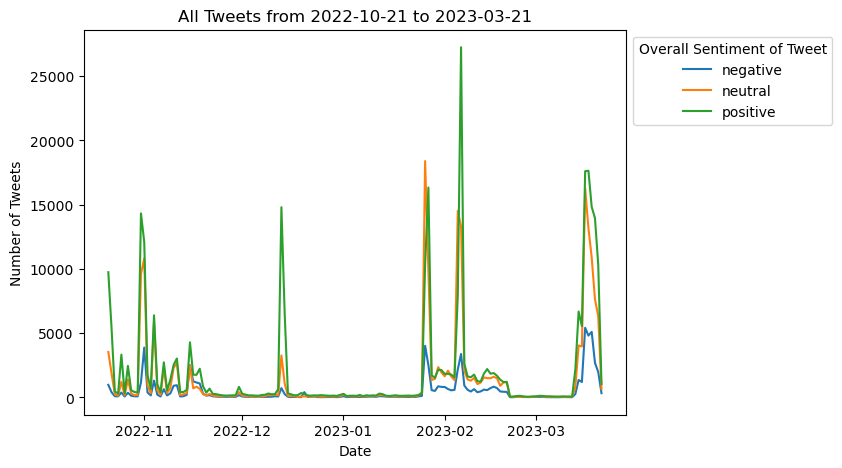

In [395]:
# need to group the data by date and then plot the day's tweets according to overall sentiment of the tweet
dates = tweets['Date'].unique()
x = dates
ax = temp.plot(figsize=(7, 5), xlabel='Date', ylabel='Number of Tweets', rot=0, title='All Tweets from 2022-10-21 to 2023-03-21')
ax.legend(title='Overall Sentiment of Tweet', bbox_to_anchor=(1, 1), loc='best')

plt.show()

In [396]:
# for the sentiment overtime, I'm showing the percentage of positive, negative, and neutral tweets
t = temp
t['sum'] = t.sum(axis=1)
t['negative_avg'] = t['negative'] / t['sum'] * 100
t['neutral_avg'] = t['neutral'] / t['sum'] * 100
t['positive_avg'] = t['positive'] / t['sum'] * 100
print(t)

overall_sentiment  negative  neutral  positive    sum  negative_avg  \
Date                                                                  
2022-10-21              978     3542      9748  14268      6.854500   
2022-10-22              399     1857      5352   7608      5.244479   
2022-10-23               91      236       467    794     11.460957   
2022-10-24               82      140       294    516     15.891473   
2022-10-25              378     1212      3330   4920      7.682927   
...                     ...      ...       ...    ...           ...   
2023-03-17             4811    13183     17647  35641     13.498499   
2023-03-18             5104    10896     14830  30830     16.555303   
2023-03-19             2694     7643     13964  24301     11.085964   
2023-03-20             1979     6333     10336  18648     10.612398   
2023-03-21              327      649      1041   2017     16.212196   

overall_sentiment  neutral_avg  positive_avg  
Date                         

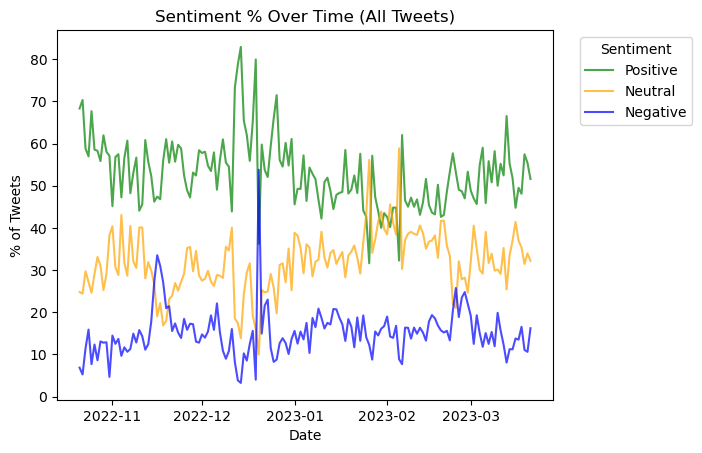

In [397]:
plt.plot(dates, t['positive_avg'], color='g', alpha=0.7, label='Positive')
plt.plot(dates, t['neutral_avg'], color='orange', alpha=0.7, label='Neutral')
plt.plot(dates, t['negative_avg'], color='b', alpha=0.7, label='Negative')

plt.legend(title='Sentiment', bbox_to_anchor=(1.04, 1),loc='upper left')

plt.title('Sentiment % Over Time (All Tweets)')
plt.xlabel('Date')
plt.ylabel('% of Tweets')

plt.show()

### Pre-Eras Tour Announcement (All Tweets PRIOR to November 15, 2022)

In [398]:
from datetime import date
t = tweets[['Date', 'overall_sentiment']].where(tweets['Date'] < date(2022, 11, 15))
t = t.groupby('Date')['overall_sentiment'].value_counts().unstack()
t['sum'] = t.sum(axis=1)
t['negative_avg'] = t['negative'] / t['sum'] * 100
t['neutral_avg'] = t['neutral'] / t['sum'] * 100
t['positive_avg'] = t['positive'] / t['sum'] * 100

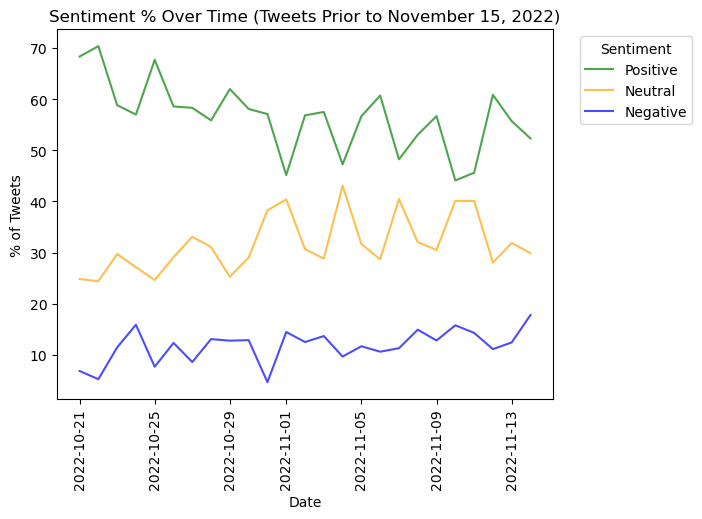

In [399]:
plt.plot(t['positive_avg'], color='g', alpha=0.7, label='Positive')
plt.plot(t['neutral_avg'], color='orange', alpha=0.7, label='Neutral')
plt.plot(t['negative_avg'], color='b', alpha=0.7, label='Negative')

plt.legend(title='Sentiment', bbox_to_anchor=(1.04, 1),loc='upper left')

plt.title('Sentiment % Over Time (Tweets Prior to November 15, 2022)')
plt.xlabel('Date')
plt.ylabel('% of Tweets')

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
plt.xticks(rotation='vertical')
plt.show()

### Post-Ticket Presale Fiasco to Just Before the Opening Shows of the Tour (All Tweets On November 15, 2022 to March 17, 2023)

In [400]:
t = tweets[['Date', 'overall_sentiment']].where((tweets['Date'] >= date(2022, 11, 15)) & (tweets['Date'] < date(2023, 3, 17)))
t = t.groupby('Date')['overall_sentiment'].value_counts().unstack()
t['sum'] = t.sum(axis=1)
t['negative_avg'] = t['negative'] / t['sum'] * 100
t['neutral_avg'] = t['neutral'] / t['sum'] * 100
t['positive_avg'] = t['positive'] / t['sum'] * 100

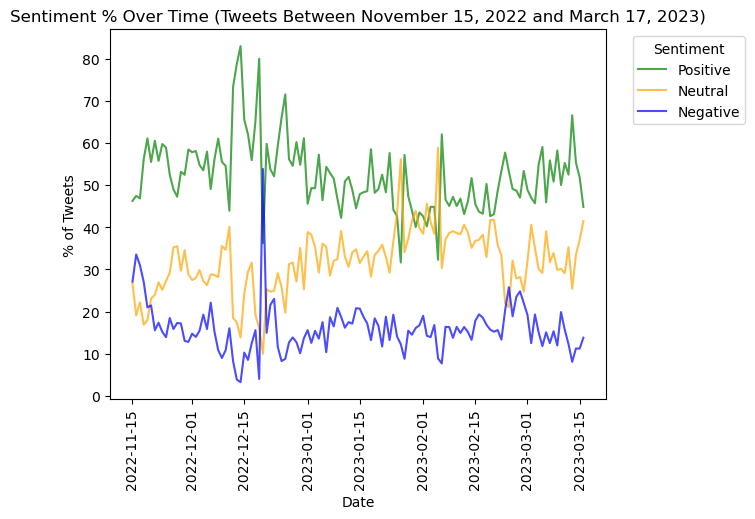

In [401]:
plt.plot(t['positive_avg'], color='g', alpha=0.7, label='Positive')
plt.plot(t['neutral_avg'], color='orange', alpha=0.7, label='Neutral')
plt.plot(t['negative_avg'], color='b', alpha=0.7, label='Negative')

plt.legend(title='Sentiment', bbox_to_anchor=(1.04, 1),loc='upper left')

plt.title('Sentiment % Over Time (Tweets Between November 15, 2022 and March 17, 2023)')
plt.xlabel('Date')
plt.ylabel('% of Tweets')

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
plt.xticks(rotation='vertical')
plt.show()

### Post-Eras Tour Opening Shows (All Tweets On or After March 17, 2023)

In [402]:
t = tweets[['Date', 'overall_sentiment']].where(tweets['Date'] >= date(2023, 3, 17))
t = t.groupby('Date')['overall_sentiment'].value_counts().unstack()
t['sum'] = t.sum(axis=1)
t['negative_avg'] = t['negative'] / t['sum'] * 100
t['neutral_avg'] = t['neutral'] / t['sum'] * 100
t['positive_avg'] = t['positive'] / t['sum'] * 100

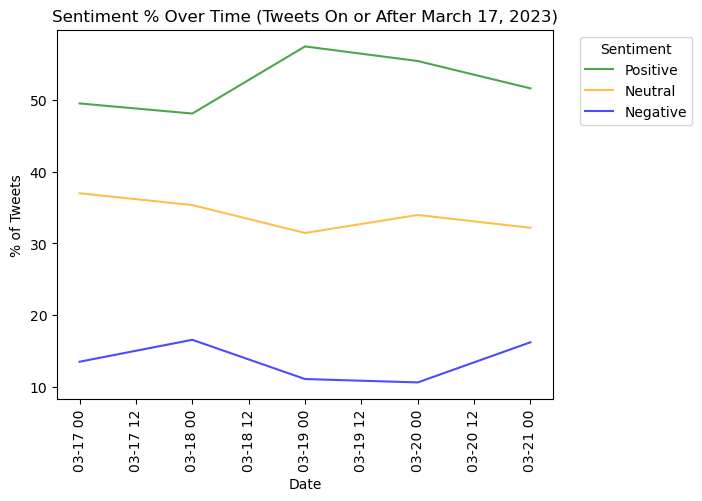

In [403]:
plt.plot(t['positive_avg'], color='g', alpha=0.7, label='Positive')
plt.plot(t['neutral_avg'], color='orange', alpha=0.7, label='Neutral')
plt.plot(t['negative_avg'], color='b', alpha=0.7, label='Negative')

plt.legend(title='Sentiment', bbox_to_anchor=(1.04, 1),loc='upper left')

plt.title('Sentiment % Over Time (Tweets On or After March 17, 2023)')
plt.xlabel('Date')
plt.ylabel('% of Tweets')
        
plt.xticks(rotation='vertical')
plt.show()

# Conclusion

To frame this conversation, I will be referring to changes in overall sentiment using the Positive Sentiment curves.

In the period before the Eras Tour announcement, the Positive sentiment % is typically above 50% which indicated that the overall sentiment is largely positive.

In the period after the beginning of presale to just before the start of tour, the Positive sentiment % is still largely above 50% but dips below that during certain periods of time indicating the sentiment became more negative and/or neutral. Looking at the negative and neutral curves, we can visually confirm this is the case.

In the period after the opening shows, the Positive sentiment % is around 50% which is lower than during the first period analyzed.


Looking at the Sentiment % Overtime (All Tweets) graph, it's easier to see how the Positive sentiment changes overtime indicating how sentiment became more negative and/or neutral overtime. The sentiment spikes whether positive, negative, or neutral don't map directly to the dates listed in my hypothesis so there is something else going on. When I was doing manual classification, I noticed that there were several unrelated tweets in the dataset that were included because they mentioned her account so they were likely skewing my results. Better screening of the Tweets and excluding irrelevant ones (i.e. Tweets related to the opioid crisis in Toronto and Tweets about the Ukraine crisis that mention Taylor's account should have been excluded) would have likely made the sentiment spikes correlate more to the timeframes I had listed.

**April 10 - 2023 Update:** I think I figured out the positive spikes that are 10k or greater in the Tweets 2022-10-21 - 2023-03-21 graph:

- October: Taylor Swift released her 10th studio album Midnights
- November: Taylor announces the Eras Tour and ticket presale date occurred
- December: Taylor's birthday is December 13th
- Late January: LiveNation/Ticketmaster USA senate hearing resulting from the Eras ticket presale fiasco
- Early February: Record Store Day Exclusive of a live performance of her Folklore album was announced
- March: Eras tour begins March 17th in Glendale, Arizona